# Your Title Information Goes Here
Fill me in

## Setup

In [1]:
include("CHEME-5760-L13a-CodeLib.jl");

In [2]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
  Activating project at `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Project.toml`
  No Changes to `~/Documents/GitHub/5760FinalProject/CHEME-5660-Project-Template-F23/Manifest.toml`


## Prerequisites: Load historical dataset, compute expected returns and get 2023 `SPY` data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) since `01-03-2018` until `12-01-2023`, along with data for a few exchange traded funds and volatility products during that time. 

In [3]:
original_dataset = load(joinpath(_PATH_TO_DATA, 
        "SP500-Daily-OHLC-1-3-2018-to-12-01-2023.jld2")) |> x-> x["dataset"];

### Clean the data
Not all of the tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquistion or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximim value, e.g., `AAPL` and save that value in the `maximum_number_trading_days` variable:

In [4]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [5]:
dataset = Dict{String,DataFrame}();
for (ticker,data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset;

Let's get a list of firms that we have in cleaned up `dataset`, and save it in the `all_tickers` array:

In [6]:
all_tickers = keys(dataset) |> collect |> sort;
K = length(all_tickers);

### Get the 2023 `SPY` data

In [7]:
startdate = Date(2023,01,03);
SPY_dataset = dataset["SPY"];
SPY_df = filter(:timestamp => x-> x >= startdate, SPY_dataset);
SPY_df

Row,volume,volume_weighted_average_price,open,close,high,low,timestamp,number_of_transactions
,Float64,Float64,Float64,Float64,Float64,Float64,DateTime,Int64
1,7.48507e7,380.958,384.37,380.82,386.43,377.831,2023-01-03T05:00:00,590240
2,8.59341e7,383.149,383.18,383.76,385.88,380.0,2023-01-04T05:00:00,632808
3,7.62754e7,380.262,381.72,379.38,381.84,378.76,2023-01-05T05:00:00,530896
4,1.04053e8,385.246,382.61,388.08,389.25,379.413,2023-01-06T05:00:00,687390
5,7.39781e7,390.363,390.37,387.86,393.7,387.67,2023-01-09T05:00:00,549428
6,6.52981e7,389.082,387.25,390.58,390.65,386.27,2023-01-10T05:00:00,471958
7,6.8703e7,393.3,392.23,395.52,395.6,391.38,2023-01-11T05:00:00,452701
8,9.01457e7,396.312,396.67,396.96,398.485,392.42,2023-01-12T05:00:00,665042
9,6.38539e7,396.838,393.62,398.5,399.1,393.34,2023-01-13T05:00:00,468376


### Compute the expected return for all firms in the dataset
The expected return $\mathbb{E}(r_{i})$ and covariance matrix $\Sigma$ will be used in our calculations, so we'll provide values for both of these items for the entire data set (all `N = 459` tickers), and then you can pick out which tickers you are interested in. 

* First, we compute the expected (annualized) log return by passing the `dataset` and the entire list of firms we have in the dataset (held in the $N\times{1}$ `all_array` array) to the `log_return_matrix(...)` method. The result is stored in the `all_firms_return_matrix` variable, a $T-1\times{N}$ array of log return values. Each row of `all_firms_return_matrix` corresponds to a time-value, while each column corresponds to a firm:

In [8]:
all_firms_return_matrix = log_return_matrix(dataset, all_tickers, 
    Δt = (1.0/252.0), risk_free_rate = 0.0);

## Your project starts here ....

In [9]:
first_dataset = Dict{String,DataFrame}(); #Dataset from 2018-2022
test_dataset = Dict{String,DataFrame}();  #Dataset for 2023

for (ticker,data) ∈ dataset
    first_data = first(dataset[ticker],1258) #The first 1258 rows have data for 2018-2022
    first_dataset[ticker] = first_data
    
    test_data = last(dataset[ticker],231)    #The last 231 rows have data for 2023
    test_dataset[ticker] = test_data
end

In [10]:
#first_dataset["AAPL"]

In [11]:
#test_dataset["AAPL"]

In [12]:
#dataset["PLD"]

In [14]:
function rbf(x::Tuple{Int,Int},y::Tuple{Int,Int}; σ = 1.0)::Float64
    d = sqrt((x[1] - y[1])^2 + (x[2] - y[2])^2);
    return exp(-d/(2*σ^2))
end;

# Step 1: Build a model of the world -
number_of_rows = 5
number_of_cols = 5
nactions = 4; 
nstates = (number_of_rows*number_of_cols);
𝒮 = range(1,stop=nstates,step=1) |> collect;
𝒜 = range(1,stop=nactions,step=1) |> collect;

In [15]:
# setup rewards -
significant_loss = -1000.0; #if the portfolio loses more than 3% compared to SPY that day
no_change = 0.0;
significant_gain = 1000.0; #if the portfolio gains more than 3% compared to SPY that day


soft_wall_set = Set{Tuple{Int,Int}}();
push!(soft_wall_set, (2,2));
σ = 1.0;
default_reward = -1.0;

# setup rewards -
rewards = Dict{Tuple{Int,Int}, Float64}()
rewards[(5,5)] = significant_gain

absorbing_state_set = Set{Tuple{Int,Int}}()
push!(absorbing_state_set, (5,5));

In [16]:
# do some shaping?
is_reward_shaping_on = true;
if (is_reward_shaping_on == true)
    for s in 𝒮
        for s′ in 𝒮
            coordinate = (s,s′);
            if (haskey(rewards, coordinate) == false && in(coordinate,soft_wall_set) == false && 
                    in(coordinate,absorbing_state_set) == false)
                rewards[coordinate] = default_reward + significant_gain*rbf(coordinate, (5,6), σ = σ);
            end
        end
    end
end

In [17]:
# call the factory -
world_model = build(MyRectangularGridWorldModel, (
        nrows=number_of_rows, ncols=number_of_cols, rewards = rewards, defaultreward = default_reward));

In [18]:
α = 0.7;  # learning rate
# α = 0.0;  # learning rate
γ = 0.95; # discount rate
nstates = (number_of_rows*number_of_cols);
agent_model = build(MyQLearningAgentModel, (
    states = 𝒮,
    actions = 𝒜,
    α = α,
    γ = γ,
    Q = zeros(nstates,nactions) # Hmmm. Could we do something better that this?
));

In [19]:
startstate = (3,2); # start position at 3 shares AAPL and 2 Bonds
number_of_episodes = 100;
number_of_iterations = 231;

In [20]:
my_Q_dictionary = Dict{Tuple{Int,Int}, Array{Float64,2}}();
coordinate = startstate;
for i ∈ 1:number_of_episodes
    
    # run an episode, and grab the Q
    result = simulate(agent_model, world_model, coordinate, number_of_iterations, ϵ = 0.7);

    # update the agent with the Q from the last episode, and try to refine this Q
    # Analogy: practice make perfect ...
    agent_model.Q = result.Q;
end
my_Q_dictionary[coordinate] = agent_model.Q;

In [21]:
for s ∈ 𝒮
    for s′ ∈ 𝒮
          
        coordinate = (s,s′)
        if (in(coordinate, soft_wall_set) == false && in(coordinate,absorbing_state_set) == false && 
            haskey(world_model.states,coordinate) == true)
            
            # @show coordinate
            for i ∈ 1:number_of_episodes
    
                # run an episode, and grab the Q
                result = simulate(agent_model, world_model, coordinate, number_of_iterations, ϵ = 0.7);
        
                # update the agent with the Q from the last episode, and try to refine this Q
                # Analogy: practice make perfect ...
                agent_model.Q = result.Q;
            end
            my_Q_dictionary[coordinate] = agent_model.Q;
        end
    end
end

In [22]:
Q = my_Q_dictionary[startstate];
my_π = policy(Q);

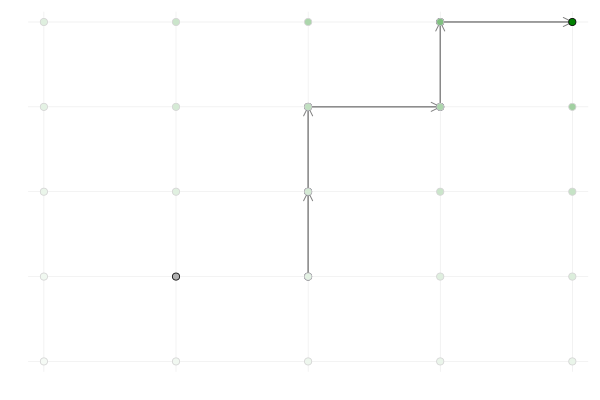

In [23]:
# draw the path -
p = plot();
initial_site = startstate
hit_absorbing_state = false
s = world_model.states[initial_site];
visited_sites = Set{Tuple{Int,Int}}();
push!(visited_sites, initial_site);

while (hit_absorbing_state == false)
    current_position = world_model.coordinates[s]
    a = my_π[s];
    Δ = world_model.moves[a];
    new_position =  current_position .+ Δ
    scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:blue)
    plot!([current_position[1], new_position[1]],[current_position[2],new_position[2]], label="", arrow=true, lw=1, c=:gray)
    
    if (in(new_position, absorbing_state_set) == true || in(new_position, visited_sites) == true)
        hit_absorbing_state = true;
    elseif (haskey(world_model.states, new_position) == true)
        s = world_model.states[new_position];
        push!(visited_sites, new_position);
    else
        hit_absorbing_state = true; # we drove off the map
    end
end

# draw the grid -
for s ∈ 𝒮
    current_position = world_model.coordinates[s]
    a = my_π[s];
    Δ = world_model.moves[a];
    new_position =  current_position .+ Δ
    
    if (haskey(rewards, current_position) == true && rewards[current_position] == significant_gain)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:green, ms=4)
    elseif (haskey(rewards, current_position) == true && rewards[current_position] == significant_loss)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:red, ms=4)
    elseif (in(current_position, soft_wall_set) == true)
        scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:gray69, ms=4)
    else
        if (is_reward_shaping_on == true)
            new_color = weighted_color_mean(rbf(current_position, (5,6), σ = σ), colorant"green", colorant"white")
            scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:lightgray, c=new_color)
        else
            scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, msc=:black, c=:white)
        end
    end
end
current()

));## Disclaimer and Risks
__This content is offered solely for training and  informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy,  is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on your evaluation of your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.